# **LPA PIC/Laser Plasma Notes and Code**

In [42]:
# Import default stuff
import numpy as np
import scipy
import sklearn
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
import pandas
from matplotlib import animation
from IPython.display import Video
from dataclasses import make_dataclass
from IPython.display import Image
import matplotlib as mpl
from IPython.display import HTML

%matplotlib inline
from matplotlib.animation import PillowWriter

# **Ruhl 08**

## Characteristics that specify laser-plasma properties

* **Property 1:** Ratio of plasma density $n$ to laser critical density $n_c$.

    * If $n=n_c$ then the laser frequency is the electron plasma frequency $\omega_p= (e^2n/\epsilon_0 m_e)^{1/2}$
    
        * In this case, $\frac{\omega_p}{\omega}=\left( \frac{n}{n_c} \right)^{1/2}$

    * A plasma that has $\frac{\omega_p}{\omega} < 1$ is called **under-critical** or **under-dense** while $\frac{\omega_p}{\omega} > 1$ is called **over-critical** or **over-dense**.

    * **Group velocity:** $v_g = \frac{\partial \omega}{\partial k}$ of the laser radiation can approach $c$ and depends on plasma density. 

    * **Penetration depth:**  $l_s = c/\omega_p$.

* **Property 2:** Amplitude $a$ of laser field.

    * Dimensionless and defined by $a = v_{os}/c$. Accounts for relativistic plasma effects.

        * **Electron oscillation velocity:** $v_{os} = \frac{e \ E_0}{m_e \omega}$
        
        * **Vacuum field strength of laser radiation:** $E_0$

* **Property 3:** Initial plasma temperature.

    * Characterized by $v_{th}/c$

        * **Thermal velocity:** $v_{th} = (k_B \ T_e / m_e)^{1/2}$

        * **Plasma Temperature:** T_e

With the above three parameters, we can describe the response of a plasma to any applied electric and magnetic fields. In cases where plasma can not be approximated as collisionless, other parameters become important. 


### Electron interacting witih linearly polarized plane EM wave

Equations of motion:

$$\epsilon = \frac{1}{2} m_e c^2a^2, \quad \mathbf{p_{\perp}} = m_e c \mathbf{a_\perp} \quad p_{\parallel} = \frac{1}{2}m_e c a^2$$

Where:

* $\epsilon$ is electron energy.

* $\mathbf{p_\perp}$ is the momentum perpendicular to wave propagation direction.

* $\mathbf{p_\parallel}$ is the momentum parallel to wave propagation direction.
    
* $\mathbf{a_\perp} = \frac{e \mathbf{A_\perp}}{m_e \ c}$.

    * $\mathbf{A_\perp} = \frac{\mathbf{E_\perp}}{\omega}$.


When $a > 2$, the electron motion in the wave is relativistic. Laser intensities are called relativistic if $a > 1$. 

### Self focusing

Relativistic self-focusing is caused by a nonlinear change in the refractive index $\eta$ of the plasma caused bu relativstic mass gain of the oscillating electrons in the laser's field as well as ponderomotive force of the laser radiation. It can cause 10X intensity enhancements.

Power threshold for self focusing phenomena (only for beams, not pulses):

$$P_c = \frac{2m_e^2 c^5 \omega ^2}{e^2 \omega_p^2}$$

The self-focused beam also is usually at a non $90^\circ$ angle to the plane normal to propagation.

### Self guiding

Electrons that are accelerated within the laser beam are part of a current that generates a strong magnetic field found with:

$$\nabla \times \mathbf{B} = -\frac{en}{\epsilon_0 c^2}\mathbf{v}$$

where $v$ is the fluid velocity of the electrons. 

# Ruhl Physics Model

Using the Vlasov-Boltzmann equations and Maxwell's equations allows us to describe the interactions within plasma models. 

* **Plasma distribution function:** $f_k(\mathbf{x}, \mathbf{p}, t)$ gives the probability of finding particles of type $k$ in a given volume of phase space. 

* **Transport Equations**: describe the...

# Particle In Cell SMILIEI

PIC is important for fluid dynamics simulations. 

### Vlasov-Maxwell Model

For a collisionless plasma, Vlasov's equation is satisfied:

$$\left( \partial_t + \frac{\mathbf{p}}{m_s \ \gamma}\cdot \nabla + \mathbf{F_L} \cdot \nabla_p\right)f_s = 0$$

Where:

* Different particle species in the plasma have distribution function $f_s(t, \mathbf{x}, \mathbf{p})$.
    * $s$ is a particle species that has charge $q_s$ and mass $m_s$.
    * $\mathbf{x, p}$ are position and momentum of an element in phase-space.
    * The relativistic Lorentz factor: $\gamma = \sqrt{1 + \mathbf{p}^2/(m_sc)^2}$.
    * Lorentz force on a particle of velocity $\mathbf{v} = \mathbf{p}/(m_s \gamma)$ is given by $\mathbf{F_L} = q_s (\mathbf{E}+\mathbf{v} \times \mathbf{B})$.

The Lorentz force allows for electric and magnetic fields that satisfy Maxwell's equations, which are:

$$\nabla \cdot \mathbf{B} = 0, \quad \nabla \cdot \mathbf{E} = \rho/\epsilon_0$$
$$\nabla \times \mathbf{B} = \mu_0 \mathbf{J} + \mu_0 \epsilon_0 \partial_t \mathbf{E}, \quad \nabla \times \mathbf{E} = \partial_t \mathbf{B}$$

This set of equations/constraints are known as the Vlasov-Maxwell model.

The electric field $\mathbf{E}(t, \mathbf{x})$ and magnetic field $\mathbf{B}(t, \mathbf{x})$ created are modified by the charge and current densities which are:

$$\rho(t, \mathbf{x}) = \sum_s q_s \int d^3 p \ f_s(t, \mathbf{x}, \mathbf{p})$$
$$\mathbf{J}(t, \mathbf{x}) = \sum_s q_s \int d^3p \ \mathbf{v} \ f_s(t, \mathbf{x}, \mathbf{p})$$

SMILEI's approach uses natural units where $c=1$, and charges/masses are given in term of elementary charge/electron mass. Time and space normalization can be tweaked and scaled.

### PIC Method

In PIC, the particle distribution function is quantized and is a sum of "quasi-particles":

$$f_s(t, \mathbf{x}, \mathbf{p}) = \sum^{N_s}_{p=1}w_p \ S(\mathbf{x} - \mathbf{x}_p(t))\delta (\mathbf{p} - \mathbf{p}_p(t)).$$

Where:
* $w_p$ is the "weight" of a quasi-particle
* $\mathbf{x_p}$ is quasi-particle position
* $\mathbf{p_p}$ is quasi-particle momentum
* $S(\mathbf{x})$ is the shape function of the quasi particles.
    * It's pretty complicated *COME BACK TO THIS

In PIC code, we have to integrate Vlasov's equation along the trajectories of quaso-particles and solve Maxwell's equations on a discrete spatial grid. Spaces between grid nodes are "cells." Using the discretization approach, we can get the relativistic equations of motion for all quasi-particles:

$$\frac{d\mathbf{x}_p}{dt} = \frac{\mathbf{u}_p}{\gamma_p}, \quad \frac{d\mathbf{u}_p}{dt} = r_s \left(\mathbf{E}_p + \frac{\mathbf{u_p}}{\gamma_p} \times \mathbf{B}_p \right).$$

Where:

* **Charge-over-mass ratio**: $r_s = q_s/m_s$ for species $s$
* **Quasi-particle reduced momentum**: $\mathbf{u}_p = \mathbf{p}_p/m_s$

The electric and magnetic fields also have to be interpolated at the positions of every particle, and Maxwell's equations must be solved as well.


# **Practice 1:** Plasma Particle Motion Implementation: Uniform $\mathbf{E, B}$ fields

This is not quite PIC, because I haven't discretized the space portions to calculate the fields, since these are uniform fields. Essentially, this becomes a solver for Vlasov's equations.

In [141]:
# PIC Practice in a uniform E and B field (Ignoring Maxwell)
from scipy.integrate import solve_ivp

class plasma_uniform:
    """
    An implementation of PIC in a cubic grid without worrying about Maxwell's equations

    Parameters:
        n (int): number of species
        p (int): number of quasi-particles per species
        E (float): Electric field strength (global)
        B (float): Magnetic field strength (global)
        size (int): Grid length 
    """

    def __init__(self, N=2, p=3, E=[0,0,5], B=[5,0,0], momentum_mean=10, momentum_sigma=1.5, size=20, charge_scale = 3, mass_scale = 3):
        #np.random.seed(random_state)
        self.N = N
        self.p = p
        self.E = E
        self.B = B
        self.size = size
        self.charge_scale = 3

        # Initial positions, momenta
        positions = np.zeros([N, p, 3])
        momenta = np.zeros([N, p, 3])
        charges = np.zeros([N])
        masses = np.zeros([N])
        
        for i in range(N):
            # Doing momentum with normal dist and position with uniform
            charges[i] = np.random.uniform() * charge_scale
            masses[i] = np.random.uniform() * mass_scale

            for j in range(p):
                x_p = np.random.uniform(size=(3)) * size
                m_p = np.random.normal(momentum_mean, momentum_sigma, size=(3))

                for k in range(3):
                    positions[i][j][k] = x_p[k]
                    momenta[i][j][k] = m_p[k]

        self.positions = positions
        self.momenta = momenta
        self.charges = charges
        self.masses = masses

    # Assemble momentum differential equation
    # Equation 8 in Smilei
    def rhs_momentum(self, t, n):
        """
        Given a time, return the right-hand side for the quasi-particle momentum using randomly generated momentum vector (from the initialization)
        """
        rhs = np.zeros([(self.N), (self.p), 3])

        temp = n.reshape([self.N, self.p, 3])

        for i in range(self.N):
            r_s = self.charges[i]/self.masses[i]
            p_i = [0,0,0]

            for j in range(self.p):
                p_i = temp[i][j]
                gamma = np.sqrt(1+np.dot(p_i, p_i)/(self.masses[i]**2))
                term = r_s * (self.E + np.cross((p_i/gamma), self.B))
                for k in range(3):
                    rhs[i][j][k] = term[k]

        return rhs.ravel()

    # Equation 7 in Smilei
    def rhs_position(self, t, n):
        """
        Given a time, return the right-hand side for the quasi-particle position 
        """
        rhs = np.zeros([(self.N), (self.p), 3])

        temp = n.reshape([self.N, self.p, 3])

        for i in range(self.N):
            p_i = [0,0,0]
            for j in range(self.p):
                p_i = temp[i][j]
                gamma = np.sqrt(1+np.dot(p_i, p_i)/(self.masses[i]**2))
                term = p_i/gamma
                for k in range(3):
                    rhs[i][j][k] = term[k]

        return rhs.ravel()
    
    # Plotting stuff

    def plot_position(self):
        fig = plt.figure()
        ax = plt.axes(projection='3d')

        ax.set_title('Particle positions 3D')
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z')
        ax.set_xlim(self.size)
        ax.set_ylim(self.size)
        ax.set_zlim(self.size)

        plt.gca().invert_xaxis()
        plt.gca().invert_yaxis()
        plt.gca().invert_zaxis()


        for i in range(self.N):
            for j in range(self.p):
                ax.scatter(self.positions[i][j][0], self.positions[i][j][1], self.positions[i][j][2], cmap='plasma')

        plt.show()

    def plot_momentum(self):
        fig = plt.figure()
        ax = plt.axes(projection='3d')

        ax.set_title('Particle Momenta 3D')
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z')
        ax.set_xlim(self.size)
        ax.set_ylim(self.size)
        ax.set_zlim(self.size)


        plt.gca().invert_xaxis()
        plt.gca().invert_yaxis()
        plt.gca().invert_zaxis()


        for i in range(self.N):
            for j in range(self.p):
                ax.scatter(self.momenta[i][j][0], self.momenta[i][j][1], self.momenta[i][j][2])

        plt.show()



In [3]:
# Tests:

def plasma_test(N=2, p=3, E=[0,0,5], B=[5,0,0],momentum_mean=10,momentum_sigma=1.5, size=20, charge_scale = 3, mass_scale = 3):

    pic_test = plasma_uniform()
    pic_test.plot_momentum()

    sol = solve_ivp(pic_test.rhs_momentum, [0, 1000], pic_test.momenta.ravel(), method="RK45")
    return [sol, pic_test]


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter


def solution_checker(sol, N, p, interval=30, pos=True, name="vid1"):
    print("sol.y.shape =", sol.y.shape)

    Nt = sol.y.shape[1]

    arr = sol.y.reshape(N, p, 3, Nt)
    plt.figure(figsize=(7, 5))
    plt.semilogx(sol.t, sol.y.T)
    plt.xlabel("Time")
    title = ""
    if pos:
        plt.ylabel("Position")
        title = ("Position vs time")
    else:
        plt.ylabel("Momenta")
        title = ("Momentum components vs time")

    plt.show()

    arr = arr.reshape(N * p, 3, Nt)

    fig = plt.figure(figsize=(7, 7))
    ax = fig.add_subplot(111, projection="3d")

    lim = 1.1 * np.max(np.abs(arr))
    ax.set_xlim(-lim, lim)
    ax.set_ylim(-lim, lim)
    ax.set_zlim(-lim, lim)

    ax.set_xlabel("p_x")
    ax.set_ylabel("p_y")
    ax.set_zlabel("p_z")

    scatter = ax.scatter(
        arr[:, 0, 0],
        arr[:, 1, 0],
        arr[:, 2, 0],
        s=30
    )

    title = ax.set_title(f"{title} t = {sol.t[0]:.3e}")

    def update(frame):
        scatter._offsets3d = (
            arr[:, 0, frame],
            arr[:, 1, frame],
            arr[:, 2, frame],
        )
        title.set_text(f"{title} t = {sol.t[frame]:.3e}")
        return (scatter,)

    ani = FuncAnimation(
        fig,
        update,
        frames=Nt,
        interval=interval,
        blit=False
    )

    writer = PillowWriter(fps=12)
    ani.save(f"figs/{name}.gif", writer=writer, dpi=60)

    print("Saved momentum_animation.gif")

    return arr, ani


In [10]:
sol1 = plasma_test(N=2, p=5, B=[1,0,0])
#positions, ani = solution_checker(sol1[0], sol1[1].N, sol1[1].p, name='pos')
momenta, ani = solution_checker(sol1[0], sol1[1].N, sol1[1].p, pos=False, name='momen')

<IPython.core.display.Javascript object>

sol.y.shape = (18, 731)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

: 

### Position Animation
![Alt text](figs/vid1.gif)
### Momentum Animation
![Alt text](figs/momentum_animation.gif)


To check these, find the equations of motion for a plasma particle. Use the Lagrangian for a Klimontovich-Poisson system where $\mathbf{X_a}$ is a trajectory $$L_a = \left(\frac{1}{2}m_a \mathbf{\dot X_a}^2 + \frac{q_a}{c}\mathbf{\dot X_a}\cdot \mathbf{A_0}(x)-q_a \varphi\right)\delta_a$$. what we see matches the expected oscillatory patterns [which are described here](https://web2.ph.utexas.edu/~iheds/IntroductionPlasmaPhysics/375%20P%203%20(single%20particles).pdf).

# **Practice 2**: Discretizing Cells

In SMILEI, a weight-per-cell is used to calculate charge density (Eqs 11 and 12 in SMILEI). Here, I will try to implement their discretization with a resolution parameter that divides the size to introduce more cells. In section 2.3 of Smilei, the authors mention that "ghost cells" are added to the boundaries of the grid, which I assume makes using a kernel to update things easier.

In [147]:
# PIC Practice (no non-integer timestep stuff)
from scipy.integrate import solve_ivp

class PIC(plasma_uniform):
    """
    An implementation of PIC in a cubic grid 

    Parameters:
        n (int): number of species
        p (int): number of quasi-particles per species
        size (int): Grid length 
    """
    def __init__(self,  E_ext, B_ext, N=2, p=3, momentum_mean=10, momentum_sigma=1.5, size=20, charge_scale = 3, mass_scale = 3, resolution=1.0):
        #np.random.seed(random_state)
        self.N = N
        self.p = p
        self.size = size
        self.charge_scale = 3
        self.resolution = resolution

        # Initial positions, momenta
        positions = np.zeros([N, p, 3])
        momenta = np.zeros([N, p, 3])
        charges = np.zeros([N])
        masses = np.zeros([N])

        self.dimension = int((size+1)/resolution)

        self.grid_size = [self.dimension, self.dimension, self.dimension]

        self.B = B_ext
        self.E = np.zeros(self.grid_size)

        self.E += E_ext
        
        for i in range(N):
            # Doing momentum with normal dist and position with uniform
            charges[i] = np.random.uniform() * charge_scale
            masses[i] = np.random.uniform() * mass_scale

            for j in range(p):
                x_p = np.random.uniform(size=(3)) * size
                m_p = np.random.normal(momentum_mean, momentum_sigma, size=(3))

                for k in range(3):
                    positions[i][j][k] = x_p[k]
                    momenta[i][j][k] = m_p[k]

        

        self.positions = positions
        self.momenta = momenta
        self.charges = charges
        self.masses = masses
        self.charge_density = np.zeros(self.grid_size)
        self.current_density = np.zeros(self.grid_size)


    # Find charge density
    # Update Electric fields at every point
    # Start PIC loop
        # Calculate charge density
        # Calculate Current density
        # Save B field value


    def check_grid_points(self, coords=[0,0,0]):
        """
            Discretizes the particle grid and returns the number of particles and total charge in the cell.
        """
        # Given coordinates, check the particles within the discretized cell
        disc_coords = [0,0,0]

        for i in range(3):
            disc_coords[i] = np.round(coords[i])

        space_resolution = np.array([self.resolution* 0.5, self.resolution* 0.5, self.resolution* 0.5])
        
        N_s = 0
        q_c = 0

        for i in range(self.N):
            for j in range(self.p):
                for k in range(3):
                    in_cell = True

                    # Find position
                    # Round
                    # Add the bounds/precision

                    print("Position: ", self.positions[i][j][k])
                    print("Coordinate: ", k)
                    print("lower_bound: ",coords[k]+np.round(self.positions[i][j][k])-space_resolution[k])
                    print("upper_bound: ", coords[k]+np.round(self.positions[i][j][k])+space_resolution[k])

                    if not (self.positions[i][j][k] >= coords[k]+np.multiply(space_resolution, -1)[k] and coords[k]+self.positions[i][j][k] <= space_resolution[k]):
                        in_cell = False

                if in_cell:
                    print(f"Particle in cell x={disc_coords[0]}, y={disc_coords[1]}, z={disc_coords[2]}")
                    q_c += self.charges[i]
                    N_s += 1

        return N_s, q_c
    
    # Finished
    def compute_charge_density(self, verbose=False):
        # n_s is number density of particles
        # N_s is number of particles per cell

        # Loop over every cell not counting ghost rows
        # REset
        self.charge_density = np.zeros(self.grid_size)

        for i in range(self.N):
            for j in range(self.p):
                
                    # Find position
                    # Round

                lower_bounds = [int(np.round(self.positions[i][j][0])),int(np.round(self.positions[i][j][1])),int(np.round(self.positions[i][j][2]))]
                charge = self.charges[i]
                self.charge_density[lower_bounds[0]][lower_bounds[1]][lower_bounds[2]] += charge
            
                for k in range(3):
                    pos = int(self.positions[i][j][k])

                    new_bounds = np.copy(lower_bounds)
                    new_lower = np.copy(new_bounds)
                    new_upper = np.copy(new_bounds)
                    new_lower[k] = lower_bounds[k] - 1
                    new_upper[k] = lower_bounds[k] + 1
                    
                    
                    if (pos != 0):
                        self.charge_density[new_lower[0]][new_lower[1]][new_lower[2]]+=charge
                    if (pos < self.dimension-2):
                        self.charge_density[new_upper[0]][new_upper[1]][new_upper[2]]+=charge
                            
                    if(verbose):
                        print("Position: ", self.positions[i][j][k])
                        print("Coordinate: ", k)
                        print("lower_bound: ",np.floor(self.positions[i][j][k]))
                        print("Charge: ", self.charges[i]) 

    def compute_current_density(self, verbose=False):
        # n_s is number density of particles
        # N_s is number of particles per cell

        # Loop over every cell not counting ghost rows
        # REset
        self.current_density = np.zeros(self.grid_size)

        for i in range(self.N):
            for j in range(self.p):
                
                    # Find position
                    # Round

                lower_bounds = [int(np.round(self.positions[i][j][0])),int(np.round(self.positions[i][j][1])),int(np.round(self.positions[i][j][2]))]

                # current = (charge * momentum) (mass)^-1 (length unit)^-1
                current = self.charges[i] * np.sqrt(np.dot(self.momenta[i][j], self.momenta[i][j])) / (self.masses[i])

                self.charge_density[lower_bounds[0]][lower_bounds[1]][lower_bounds[2]] += current
            
                for k in range(3):
                    pos = int(self.positions[i][j][k])

                    new_bounds = np.copy(lower_bounds)
                    new_lower = np.copy(new_bounds)
                    new_upper = np.copy(new_bounds)
                    new_lower[k] = lower_bounds[k] - 1
                    new_upper[k] = lower_bounds[k] + 1
                    
                    if (pos != 0):
                        self.current_density[new_lower[0]][new_lower[1]][new_lower[2]]+=current
                    if (pos < self.dimension-2):
                        self.current_density[new_upper[0]][new_upper[1]][new_upper[2]]+=current
                            
                    if(verbose):
                        print("Position: ", self.positions[i][j][k])
                        print("Coordinate: ", k)
                        print("lower_bound: ",np.floor(self.positions[i][j][k]))
                        print("Charge: ", self.charges[i]) 

    def plot_charge_density(self):
        print(self.charge_density.shape)
        fig = plt.figure()
        x = y = z = np.linspace(0, self.dimension, num=self.dimension)
        X, Y, Z = np.meshgrid(x,y,z)
        values = self.charge_density

        ax = fig.add_subplot(111, projection='3d')
        ax.set_title("Charge Density")
        cmap = plt.get_cmap('rainbow')
        cmap.set_under('white')
        cmap_args = dict(cmap=cmap, vmin=1, vmax=8000)
        scatter = ax.scatter(X, Y, Z, c=values, cmap=cmap)
        fig.colorbar(scatter, ax=ax)    
        plt.show()

    def plot_current_density(self):
        print(self.current_density.shape)
        fig = plt.figure()
        x = y = z = np.linspace(0, self.dimension, num=self.dimension)
        X, Y, Z = np.meshgrid(x,y,z)
        values = self.current_density

        ax = fig.add_subplot(111, projection='3d')
        ax.set_title("Current Density")
        cmap = plt.get_cmap('rainbow')
        cmap.set_under('white')
        cmap_args = dict(cmap=cmap, vmin=1, vmax=8000)
        scatter = ax.scatter(X, Y, Z, c=values, cmap=cmap)
        fig.colorbar(scatter, ax=ax)    
        plt.show()

    def plot_E(self):
        print(self.E.shape)
        fig = plt.figure()
        x = y = z = np.linspace(0, self.dimension, num=self.dimension)
        X, Y, Z = np.meshgrid(x,y,z)
        values = self.E

        ax = fig.add_subplot(111, projection='3d')
        ax.set_title("E field")
        scatter = ax.scatter(X, Y, Z, c=values, cmap='PRGn')
        fig.colorbar(scatter, ax=ax)    
        plt.show()

    def plot_B(self):
        print(self.B.shape)
        fig = plt.figure()
        x = y = z = np.linspace(0, self.dimension, num=self.dimension)
        X, Y, Z = np.meshgrid(x,y,z)
        values = self.B
        #ax.plot(self.B[0], self.B[1], self.B[2])    

        ax = fig.add_subplot(111, projection='3d')
        ax.set_title("B field")
        scatter = ax.scatter(X, Y, Z, c=values, cmap='PRGn')
        fig.colorbar(scatter, ax=ax)    
        plt.show()


(21, 21, 21)


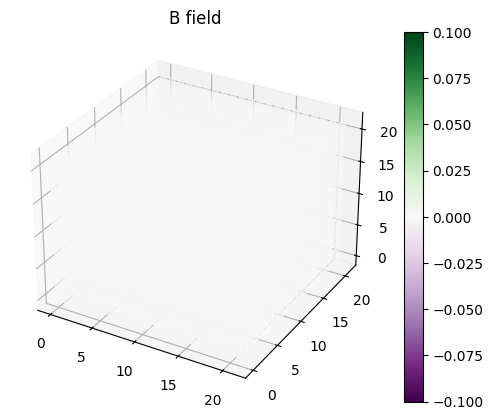

(21, 21, 21)


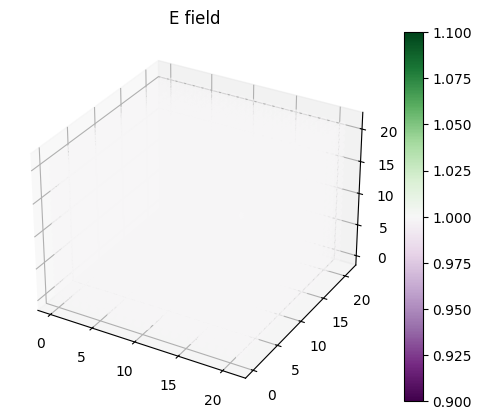

(21, 21, 21)


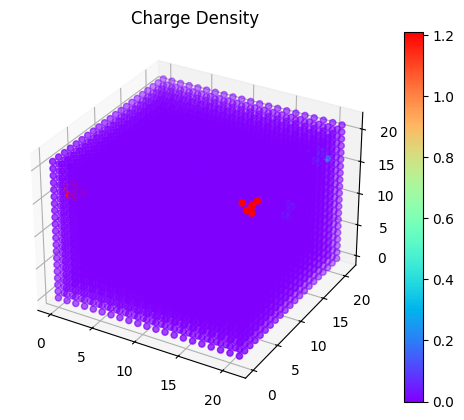

(21, 21, 21)


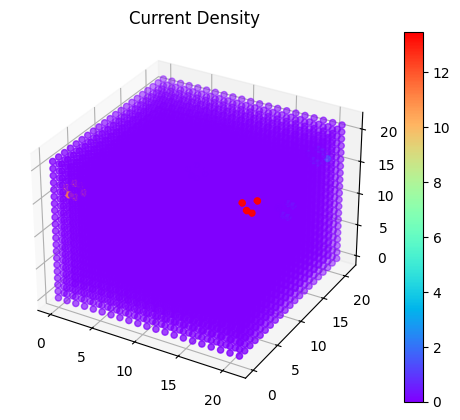

/tmp/ipykernel_1284/485613001.py:113: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(self.positions[i][j][0], self.positions[i][j][1], self.positions[i][j][2], cmap='plasma')


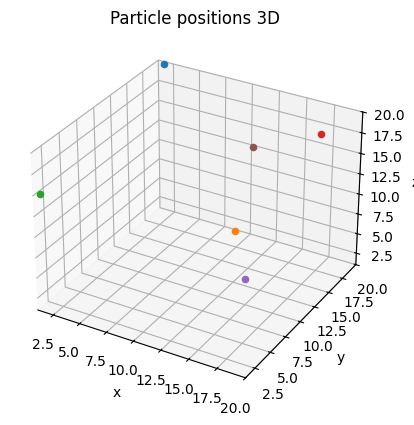

In [148]:
# Tests:
N=2
p=3
momentum_mean=10
momentum_sigma=1.5
size=20
charge_scale = 3
mass_scale = 3

E_external = np.ones([(size+1), (size+1), (size+1)])
B_external = np.zeros([(size+1), (size+1), (size+1)])


pic_test = PIC(E_external, B_external)
#pic_test.plot_momentum()

pic_test.plot_B()
pic_test.plot_E()
pic_test.compute_charge_density(verbose=False)
pic_test.plot_charge_density()
pic_test.compute_current_density(verbose=False)
pic_test.plot_current_density()
pic_test.plot_position()

#sol = solve_ivp(pic_test.rhs_momentum, [0, 1000], pic_test.momenta.ravel(), method="RK45")
#print(sol)


# **Practice 3**: Maxwell Solver